In [1]:
import numpy as np
from hugalaxy import GalaxyWrapper, calculate_mass

m33_rotational_curve = np.array( [
    [0.0, 0.0],
    [1508.7187, 38.674137],
    [2873.3889, 55.65067],
    [4116.755, 67.91063],
    [5451.099, 79.22689],
    [6846.0957, 85.01734],
    [8089.462, 88.38242],
    [9393.48, 92.42116],
    [10727.824, 95.11208],
    [11880.212, 98.342697],
    [13275.208, 99.82048],
    [14609.553, 102.10709],
    [18521.607, 104.25024],
    [22403.336, 107.60643],
    [26406.369, 115.40966],
    [30379.076, 116.87875],
    [34382.107, 116.05664],
    [38354.813, 117.93005],
    [42266.87, 121.42091],
    [46300.227, 128.55017],
    [50212.285, 132.84966]
])

M33_Distance = 3.2E6
Radius_Universe_4D = 14.03E9
redshift = M33_Distance / (Radius_Universe_4D - M33_Distance)
nr = 300
nz = 100
ntheta = 180
nr_sampling = 103
nz_sampling = 104
R_max = 50000.0
x0 = [17.90011888788805,
 0.0004742124899533843,
 0.1533971358967619,
 2.2446461026163997e-05,
 140282.89274199668]
rho_0, alpha_0, rho_1, alpha_1, h0 = x0
GalaxyMass = 5E10
M33 = GalaxyWrapper(GalaxyMass, rho_0, alpha_0, rho_1, alpha_1, h0, R_max, nr,
                    nz, nr_sampling, nz_sampling, ntheta, redshift, cuda=False)


In [2]:
M33.getGPU_ID()

0

In [3]:
M33.setGPU_ID(0)

In [4]:
M33.getGPU_ID()

0

In [5]:
M33.getCuda()

False

In [6]:
M33.setCuda(True)

In [7]:
M33.getCuda()

True

In [8]:
M33.read_galaxy_rotation_curve(m33_rotational_curve)
v_sim = M33.simulate_rotation_curve()

CUDA STATUS 1
Total Error = 94.8198
Total Error = 20037.5
Total Error = 21106
Total Error = 5463.45
Total Error = 1285.53
Total Error = 94.8198
Total Error = 7349.63
Total Error = 42780
Total Error = 3930.58
Total Error = 99846.9
Total Error = 1964.68
Total Error = 7643.13
Total Error = 1194.42
Total Error = 9008.5
Total Error = 850.006
Total Error = 8329.82
Total Error = 563.719
Total Error = 6028.13
Total Error = 376.079
Total Error = 1802.53
Total Error = 332.431
Total Error = 1581.63
Total Error = 257
Total Error = 1357.08
Total Error = 196.161
Total Error = 887.768
Total Error = 157.063
Total Error = 461.57
Total Error = 151.132
Total Error = 334.208
Total Error = 136.01
Total Error = 335.963
Total Error = 115.247
Total Error = 221.103
Total Error = 110.375
Total Error = 169.022
Total Error = 111.067
Total Error = 129.718
Total Error = 102.761
Total Error = 116.833
Total Error = 100.611
Total Error = 133.669
Total Error = 98.1285
Total Error = 105.525
Total Error = 97.0118
Total E

In [9]:
M33.print_density_parameters()

[17.689944800063415,
 0.0004710695502233989,
 0.15103011979661987,
 2.2013041645605886e-05,
 140073.3281377215]

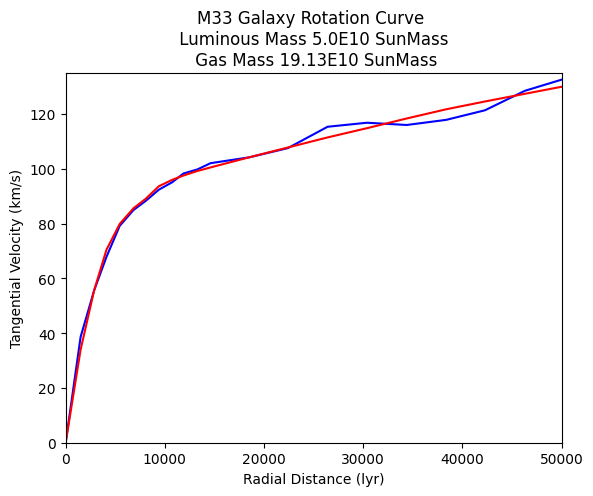

(5.0, 19.13)

In [10]:
import matplotlib.pyplot as plt
plt.plot(m33_rotational_curve[:,0], m33_rotational_curve[:,1], color="blue" )
plt.plot(m33_rotational_curve[:,0], v_sim[:], color="red" )
plt.xlabel("Radial Distance (lyr)")
plt.ylabel("Tangential Velocity (km/s)")
myMass = np.round(calculate_mass(rho_0, alpha_0, h0)/1E10,2)
gasMass = np.round(calculate_mass(rho_1, alpha_1, h0)/1E10,2)
plt.title("M33 Galaxy Rotation Curve \n Luminous Mass {}E10 SunMass \n Gas Mass {}E10 SunMass".format(myMass, gasMass))
plt.xlim(0,50000)
plt.ylim(0,135)
plt.show()
myMass, gasMass

In [ ]:
epoch=100E6
time_step_years = 10E6
eta = 100
temperature =7
for i in np.arange(11):
    current_masses = M33.DrudePropagator( epoch,  time_step_years,  eta,  temperature)
    epoch += time_step_years


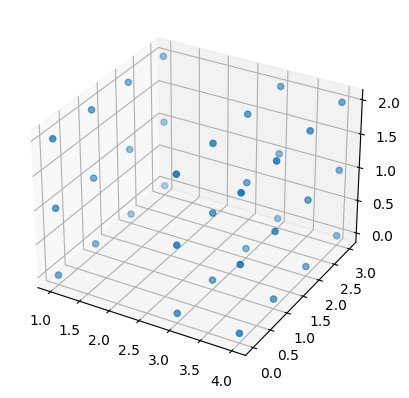

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# r is of shape [5, 1, 1]
r = torch.randn(5, 1, 1)

# r_sampling_ii is a scalar
r_sampling_ii = torch.tensor(0.5)

# mask will have shape [5, 1, 1]
mask = r < r_sampling_ii

# commonfactor is of shape [5, 4, 3]
commonfactor = torch.randn(5, 4, 3)


# mask_broad will be broadcasted to the shape of commonfactor [5, 4, 3]
mask_broad = mask * commonfactor


# Convert the tensor to a NumPy array
mask_broad_np = mask_broad.numpy()

# Get the indices where mask is True
x, y, z = np.where(mask_broad_np)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(x, y, z)
plt.show()

In [10]:
x

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [11]:
y

array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3,
       3, 3, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])

In [12]:
z

array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
       1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2])

In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the tensor
mask = torch.load("cmake-build-debug/testCPPLibrary/mask_double.pt")

# Convert the tensor to a NumPy array
mask_np = mask.numpy()

# Get the indices where mask is True
x, y, z = np.where(mask_np)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(x, y, z)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'cmake-build-debug/testCPPLibrary/mask_double.pt'